# New York Rent 

Christopher Garcia

__objective:__ This dataset is part of an exploratory data analysis. We'll be using the StreetEasy dataset to analyze rent prices in the different New York City boroughs. The dataset is available below:

https://www.kaggle.com/zohaib30/streeteasy-dataset



In [2]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv('streeteasy.csv')
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


### [Data Visualization]

explain tutorial and data viz... link to blog for explanations

#### [Multivariate analysis]

[Quantitative Variables]

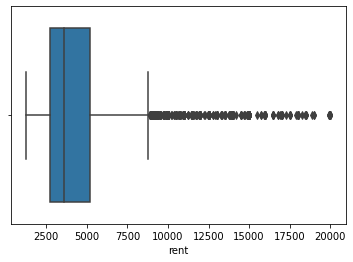

In [4]:
# visualize rent distributiin
sns.boxplot(data = df,  x = 'rent')
plt.show()

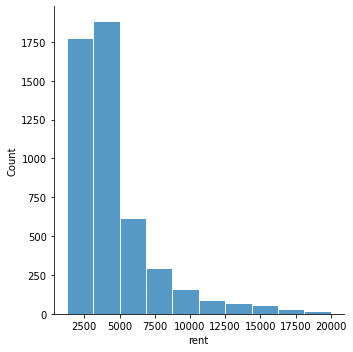

In [5]:
sns.displot(data = df, x = 'rent', bins = 10, kde = False, edgecolor = 'white')
plt.show()

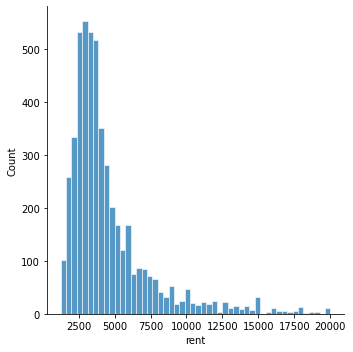

In [6]:
# increase bins
sns.displot( data = df, x = 'rent', bins = 50, edgecolor = 'white')
plt.show()

[Categorical Variables]

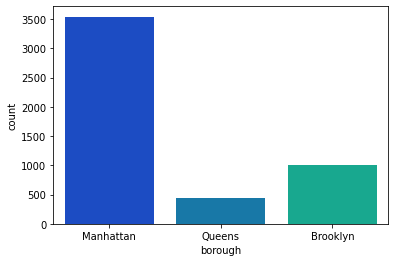

In [7]:
# counts in boroughs
# separate by color palette
sns.countplot(x = 'borough', data = df, palette = 'winter')
plt.show()

#### [Bivariate Analysis]

[One Quantitative Variable and One Categorical Variable]

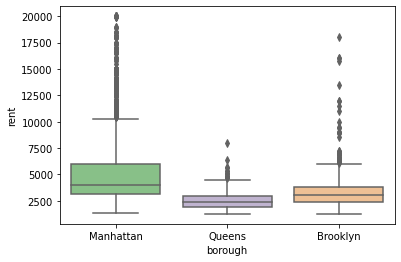

In [8]:
sns.boxplot( data = df, x = 'borough', y = 'rent', palette = 'Accent')
plt.show()

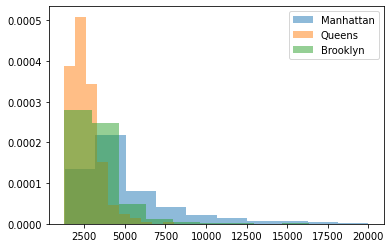

In [9]:
plt.hist(df.rent[df.borough == 'Manhattan'],
            label = 'Manhattan',
            density = True,
            alpha = 0.5)

plt.hist(df.rent[df.borough == 'Queens'],
            label = 'Queens',
            density = True,
            alpha = 0.5)
plt.hist(df.rent[df.borough == 'Brooklyn'],
            label = 'Brooklyn',
            density = True,
            alpha = 0.5)

plt.legend()
plt.show()


[Two Quantitative Variables]

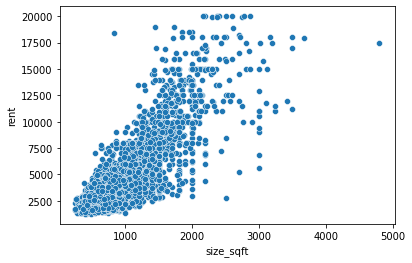

In [10]:
sns.scatterplot(data = df, x = 'size_sqft', y = 'rent')
plt.show()

[Two Categorical Variables]

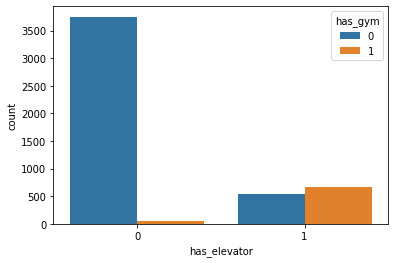

In [15]:
sns.countplot(data = df, x = 'has_elevator', hue = 'has_gym')
plt.show()

#### [Multivariate Analysis]

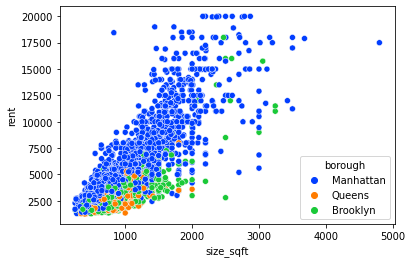

In [12]:
sns.scatterplot(data = df, 
                x = 'size_sqft',
                y = 'rent',
                hue = 'borough',
                palette = 'bright')

plt.show()

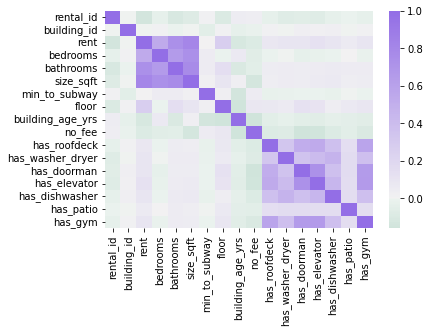

In [13]:
# define colormap which maps data values
# to the color space defined with the diverging_palette method
colors = sns.diverging_palette(150, 275, s = 80, l = 55, n = 9, as_cmap = True)

# create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(df.corr(),
            center = 0,
            cmap = colors,
            robust = True)

plt.show()

### [Multiple Linear Regression]

Now that we have explored the data, we can start answering some questions or making predictions based on different factors. For this project, we will build a `multiple linear regression model`. 

The purpose of regression is to find the line of best fit( also called a `hyperplane`) that fits the data and minimize loss or the `mean squared error`(MSE). To minimize loss, we need to be able to find the coefficients(`slope` and `intercept`) that minimizes loss. 

We will be using the `scikit-learn` library.

In [14]:
# lets view our dataset to get a sense of the different features we can use in our multiple linear regression
df.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


[Train Vs Test Set]

`Training set`: the data used to fit the model

`Test set`: the data partitioned away at the very start of the experiment (to provide an unbiased evaluation of the model)

In most cases, for machine learning algortithms it is best to split the dataset using 80% for your training and 20% for the testing set. This is not always the case, in practice, a 70/30 split can also be acceptable. As long as you are not using the same dataset to both train and test since that will not be beneficial to the accuracy of the model. 

We will use the sci-kit learn `train_test_split` function to split our data. Below are the differnt parameters that can be used with the `train_test_split` function:

- `train_size`: the proportion of the dataset to include in the train split (between 0.0 and 1.0)

- `test_size`: the proportion of the dataset to include in the test split (between 0.0 and 1.0)

- `random_state`: the seed used by the random number generator [optional]


In [16]:
# import modules
from sklearn.model_selection import train_test_split

In [17]:
# split our dataset into our predictors and target variable
# predictors
X = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 
'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 
'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

# target variable rent since we're trying to predict rent based on different features
y = df[['rent']]

# train/test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.8,
    test_size = 0.2,
    random_state = 6
)

In [19]:
# fit and train mnodel
# import model function
from sklearn.linear_model import LinearRegression


In [21]:
# create LinearRegression object
# fit model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

LinearRegression()

In [24]:
# we can now make predictions on our model
# we will use the test set
y_predict = mlr.predict(X_test)

In [26]:
# we can run some random data into our model to try and predict a value
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
 
predict = mlr.predict(my_apartment)
 
print("Predicted rent: $%.2f" % predict)

Predicted rent: $2258.75


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


We can now visualize our predicted values against our actual values to get a sense of our accuracy.

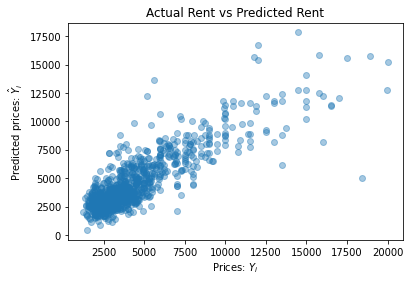

In [41]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

[Equation for Multiple linear Regression]

Here is the difference between the simple linear regression and the multiple linear regression.

linear regression: _y = b + m1x1_

multiple linear regression: _y = b + m1x1 + m2x2 + ....._

`m1` and `m2` refer to the `coefficients` or `slope`, while `b` refers to the `intercept` of the line. We can plug these values into our equation in order to compute the `y` predicted values. 

We can use scikit-learn's `coef_` and `intercept_` to give us the equation of our regression model.

Coefficients are useful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively.


In [37]:
# display coefficients 
# build equation
print('Slope:', mlr.coef_)
print('Intercept:', mlr.intercept_)

Slope: [[-461.17539618 1278.6000335     4.81900428  -14.94950189   38.70966963
    -4.52297793  -90.26769009   90.64556132  196.97409914  -41.5462096
   224.20724181    9.0336051    24.12310573  -86.37764952]]
Intercept: [-1042.5849714]


In [36]:
# we can match the predictor variables to the coefficients
X.columns

Index(['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor',
       'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer',
       'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio',
       'has_gym'],
      dtype='object')

equation: 

_rent =  -102.58 + -461.1bedrooms + 1278bathrooms + ....._

plugging in features into this equation can help us predict the rent based on those features we provide it. 


[Correlations]

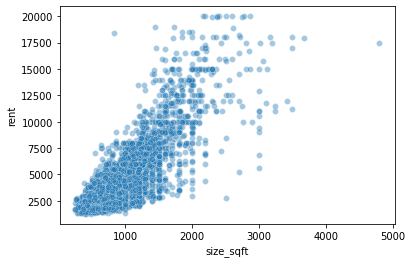

In [39]:
# check for linear relationships 
sns.scatterplot(data = df, x = 'size_sqft', y = 'rent', alpha = 0.4)

plt.show()

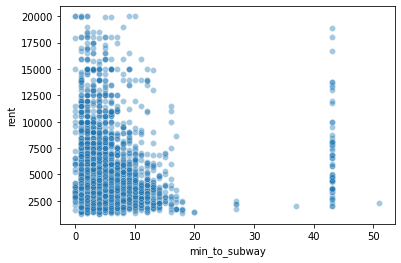

In [40]:
sns.scatterplot(data = df, x = 'min_to_subway', y = 'rent', alpha = 0.4)

plt.show()

In [ ]:
# check for more correlations
# removing highly correlated features when improve accuracy for model
# since highly correlated values may lead to multicolineartity 
# we can also remove non-linear related features 

[Evaluating the Model's Accuracy]

When trying to evaluate the accuracy of a multiple linear regression model, we can use the _Residual Analysis_. This is considered a metric of evaluation for the model. 

The difference between the actual value `y`, and the predicted value `ŷ` is the residual `e`. The equation is:

_e = y - ŷ_

For our example, `y` is the actual rent and the `ŷ` is the predicted rent. The real `y` values should be pretty close to these predicted `y` values.

sklearn‘s linear_model.LinearRegression comes with the `.score()` method that returns the _coefficient of determination_ `R²` of the prediction.

The _coefficient_ `R²` is defined as:

_1 − u / v_ try to get this in a fraction

where `u` is the _residual sum of squares_(RSS):

`((y - y_predict) ** 2).sum()`


and `v` is the _total sum of squares_(TSS):

`((y - y.mean()) ** 2).sum()`

The TSS tells you how much variation there is in the y variable.

R² is the percentage variation in y explained by all the x variables together.

For example, if we are trying to predict rent based on `size_sqft` and `bedrooms` in the apartment and the  `R²` value for our model is 0.72 — this determines that all the `x` variables (square feet and number of bedrooms) together explain 72% variation in `y` (rent).

Let's add another `x` variable, such as building’s age, to our model. By adding this third relevant `x` variable, the `R²` is expected to go up. Let say the new `R²` is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible `R²` is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a `R²` of 0.70 is considered good.


In [42]:
# metrics for model
print("Train score:")
print(mlr.score(X_train, y_train))

print("Test score:")
mlr.score(X_test, y_test)

Train score:
0.7349688159822418
Test score:


0.7158565217228201

From what we see in the `R²` value, we have a pretty good model. However, it can be better. In order to improve the accuracy of our model, we can remove features that are not correlated to rent. We can then re-train the model using a new set if features and determine whether or not we have improved accuracy. 